In [28]:
import pandas as pd
import numpy as np
from statsbombpy import sb
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
matches = sb.matches(43,3)

credentials were not supplied. open data access only


In [3]:
be_matches = matches[(matches['home_team'] == 'Belgium') | (matches['away_team'] == 'Belgium')]

In [4]:
be_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
3,7536,2018-06-18,17:00:00.000,International - FIFA World Cup,2018,Belgium,Panama,3,0,available,scheduled,2021-12-06T22:40:10.487423,2021-06-13T16:17:31.694,1,Group Stage,Olimpiyskiy Stadion Fisht,Janny Sikazwe,1.0.2,None,None
14,8650,2018-07-06,20:00:00.000,International - FIFA World Cup,2018,Brazil,Belgium,1,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,5,Quarter-finals,Kazan'' Arena,Milorad Mažić,1.0.2,None,None
29,7584,2018-07-02,20:00:00.000,International - FIFA World Cup,2018,Belgium,Japan,3,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,4,Round of 16,Rostov Arena,Malang Diedhiou,1.0.2,None,None
36,7552,2018-06-23,14:00:00.000,International - FIFA World Cup,2018,Belgium,Tunisia,5,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,2,Group Stage,Otkrytiye Arena (Moskva),Jair Marrufo,1.0.2,None,None
50,7570,2018-06-28,20:00:00.000,International - FIFA World Cup,2018,England,Belgium,0,1,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,3,Group Stage,Stadion Kaliningrad,Damir Skomina,1.0.2,None,None
57,8655,2018-07-10,20:00:00.000,International - FIFA World Cup,2018,France,Belgium,1,0,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,6,Semi-finals,Saint-Petersburg Stadium,Andrés Cunha,1.0.2,None,None
58,8657,2018-07-14,16:00:00.000,International - FIFA World Cup,2018,Belgium,England,2,0,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,7,3rd Place Final,Saint-Petersburg Stadium,Alireza Faghani,1.0.2,None,None


In [5]:
events = sb.events(8650)

credentials were not supplied. open data access only


In [6]:
xG = events[['minute', 'team', 'shot_statsbomb_xg', 'player', 'shot_outcome']]

In [7]:
xG = xG.dropna()

In [14]:
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]

hteam = xG['team'].unique()[0]
ateam = xG['team'].unique()[1]

for x in range(len(xG['shot_statsbomb_xg'])):
    if xG['team'].values[x]==ateam:
        a_xG.append(xG['shot_statsbomb_xg'].values[x])
        a_min.append(xG['minute'].values[x])
    if xG['team'].values[x]==hteam:
        h_xG.append(xG['shot_statsbomb_xg'].values[x])
        h_min.append(xG['minute'].values[x])

In [24]:
#cumulative sum of the expected goals

def cum_sum(alist):
    
    return [sum(alist[:i+1]) for i in range(len(alist))]

a_cum = cum_sum(a_xG)
h_cum = cum_sum(h_xG)

Text(0.5, 1.0, 'xG flow Belgium v Brazil')

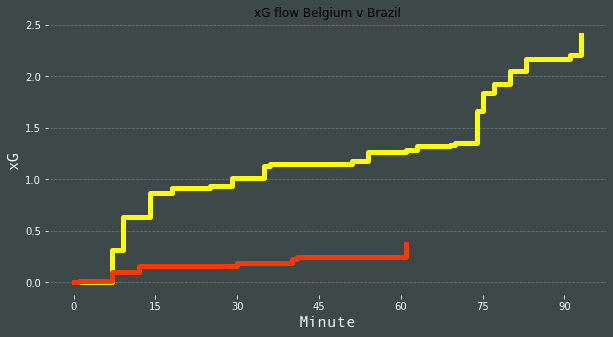

In [33]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

#set up our base layer
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute',fontname='Andale Mono',color='white',fontsize=16)
plt.ylabel('xG',fontname='Andale Mono',color='white',fontsize=16)

#plot the step graphs
ax.step(x=a_min,y=a_cum,color='#FFFF00',label=ateam,linewidth=5,where='post')
ax.step(x=h_min,y=h_cum,color='#fd3607',label=ateam,linewidth=5,where='post')

plt.title('xG flow Belgium v Brazil')